In [1]:
import os
from skimage import io

%matplotlib inline

In [2]:
original_image_name = "Image.jpg"
compressed_image_name = "CompressedImage.jpg"

In [3]:
# Get the data
import urllib.request

DOWNLOAD_ROOT = "https://raw.githubusercontent.com/hoangnguyen2003/Image-Compression/main/"
IMAGE_URL = DOWNLOAD_ROOT + "Image.jpg"

urllib.request.urlretrieve(IMAGE_URL, original_image_name)

('Image.jpg', <http.client.HTTPMessage at 0x206af6d1090>)

In [4]:
# Read image
image = io.imread(original_image_name)

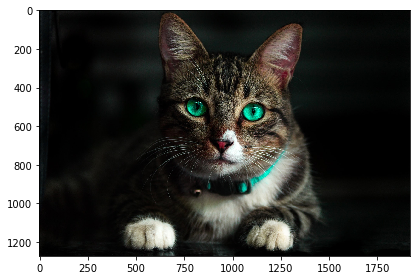

In [5]:
io.imshow(image)

In [6]:
# Image size (bytes)
os.stat(original_image_name).st_size

289639

In [7]:
image.shape

(1272, 1920, 3)

In [8]:
# Preprocessing
height, width = image.shape[0], image.shape[1]
image = image.reshape(height*width, 3)

In [9]:
image.shape

(2442240, 3)

In [10]:
# Model
from sklearn.cluster import KMeans

k = 13
kmeans = KMeans(n_clusters=k)
labels = kmeans.fit_predict(image)
clusters = kmeans.cluster_centers_

In [11]:
labels

array([12,  8,  8, ...,  0,  0,  0])

In [12]:
clusters = clusters.astype(int)
clusters

array([[  2,   3,   2],
       [117, 107,  92],
       [232, 237, 228],
       [ 68,  58,  48],
       [168, 168, 152],
       [ 14, 203, 169],
       [ 42,  38,  31],
       [ 92,  82,  69],
       [ 10,  11,   9],
       [142, 136, 119],
       [  6, 119,  91],
       [197, 201, 188],
       [ 20,  22,  19]])

In [13]:
import numpy as np

new_image = np.zeros_like(image)

In [14]:
# Create new image (compressed image)
for i in range(len(new_image)):
    new_image[i] = clusters[labels[i]]
    
new_image = new_image.reshape(height, width, 3)

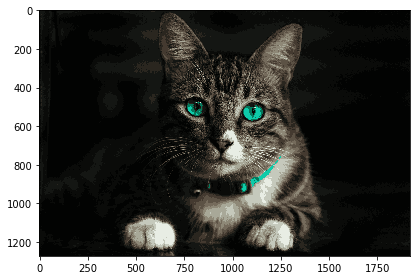

In [15]:
io.imshow(new_image)

In [16]:
# Save numpy array as an image
from PIL import Image

im = Image.fromarray(new_image)
im.save(compressed_image_name)

In [17]:
# Image size (bytes)
os.stat(compressed_image_name).st_size

223187